<a href="https://colab.research.google.com/github/dniggl/Insights/blob/main/Predict_Breast_Cancer_using_Multiple_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Predict whether a breast cancer is benign or malignant. 

In [53]:
# Import software libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
# Load the data into Colab.
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab


Saving breast_cancer_data.csv to breast_cancer_data.csv


In [3]:
#Store the data into a data frame. 
bc_data = pd.read_csv('breast_cancer_data.csv')

# Print the first 5 rows
bc_data.head(5)  

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We obtained the Breast Cancer Wisconsin (Diagnostic) dataset from Kaggle. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.  

Feature variables include:
1.   ID number
2.   Diagnosis (M = malignant, B = benign)
3.   3-32

Ten real-valued features are computed for each cell nucleus:


3.   radius (mean of distances from center to points on the perimeter)
4.   texture (standard deviation of gray-scale values)
5.   perimeter
6.   area
7.   smoothness (local variation in radius lengths)
8.   compactness (perimeter^2 / area - 1.0)
9.   concavity (severity of concave portions of the contour)
10.  concave points (number of concave portions of the contour)
11.  symmetry
12.  fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.



In [4]:
# Show information about the data columns.
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There are 569 patient records and 33 features. The data set contains integer, object and float values. The diagnosis variable will be the target variable which has values of M (malignant) and B (benign).

In [5]:
# Check for NA or missing values in features.
bc_data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Unnamed: 32 is the only column with null or missing values. We will remove this column. We will remove id column because it has no relationship to the target variable.  

In [6]:
# Remove unnamed:32 column because there are numerous missing values and 
# id column because it has no relationship to the target variable.  
bc_data = bc_data.dropna(axis=1)
bc_data = bc_data.drop('id', axis = 1)

In [7]:
# Show counts for the number of Malignant and Benign cells.
bc_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

There are 357 cases of benign and 212 cases of malignant.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


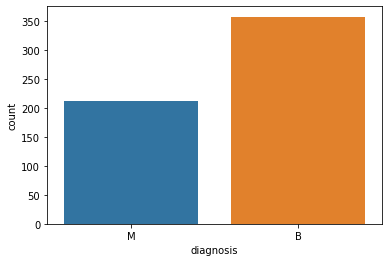

In [8]:
# Visualize the counts for the number of Malignant and Benign cells.
sns.countplot(bc_data['diagnosis'],label="Count")

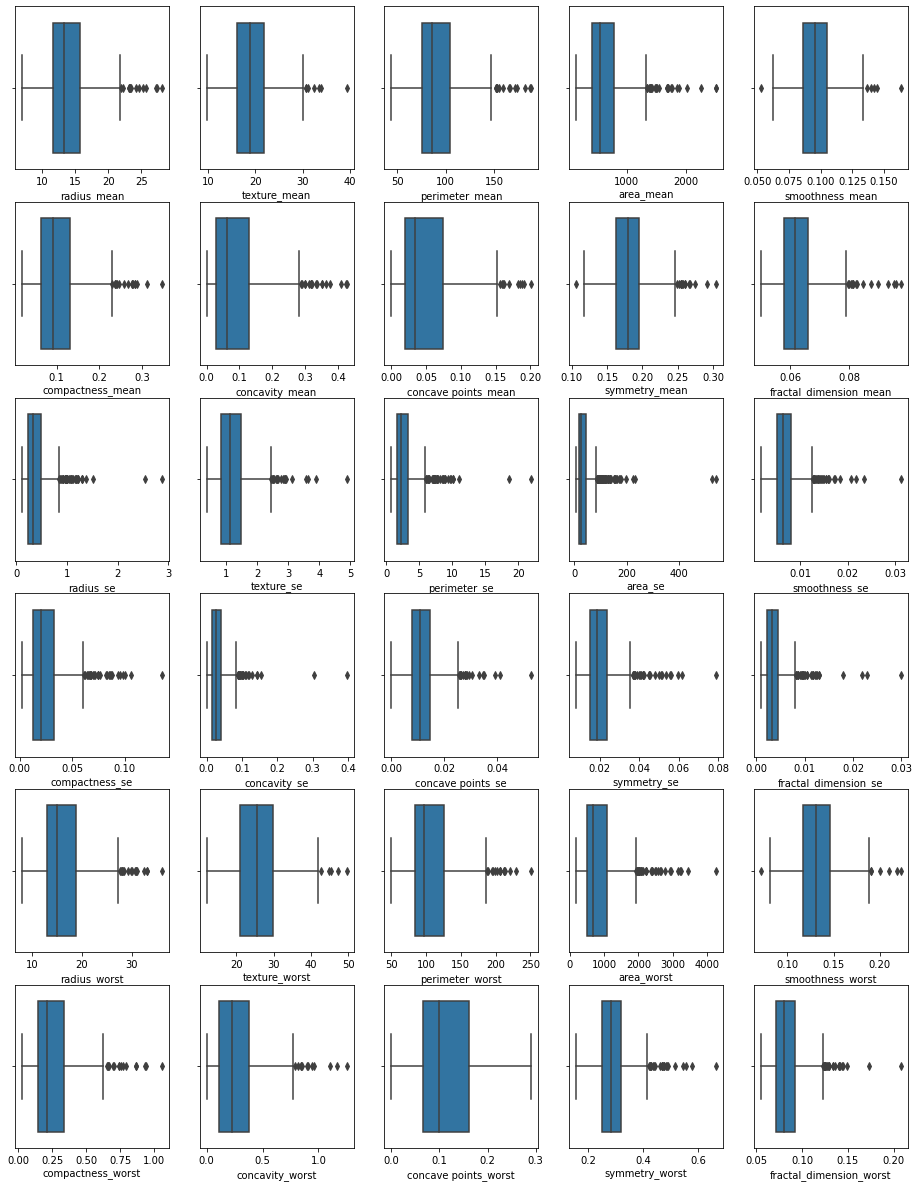

In [9]:
# Visualize distributions for each feature. 
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(16, 21))

plt.subplot(6, 5, 1)
sns.boxplot(bc_data['radius_mean'])
plt.subplot(6, 5, 2)
sns.boxplot(bc_data['texture_mean'])
plt.subplot(6, 5, 3)
sns.boxplot(bc_data['perimeter_mean'])
plt.subplot(6, 5, 4)
sns.boxplot(bc_data['area_mean'])
plt.subplot(6, 5, 5)
sns.boxplot(bc_data['smoothness_mean'])

plt.subplot(6, 5, 6)
sns.boxplot(bc_data['compactness_mean'])
plt.subplot(6, 5, 7)
sns.boxplot(bc_data['concavity_mean'])
plt.subplot(6, 5, 8)
sns.boxplot(bc_data['concave points_mean'])
plt.subplot(6, 5, 9)
sns.boxplot(bc_data['symmetry_mean'])
plt.subplot(6, 5, 10)
sns.boxplot(bc_data['fractal_dimension_mean'])

plt.subplot(6, 5, 11)
sns.boxplot(bc_data['radius_se'])
plt.subplot(6, 5, 12)
sns.boxplot(bc_data['texture_se'])
plt.subplot(6, 5, 13)
sns.boxplot(bc_data['perimeter_se'])
plt.subplot(6, 5, 14)
sns.boxplot(bc_data['area_se'])
plt.subplot(6, 5, 15)
sns.boxplot(bc_data['smoothness_se'])

plt.subplot(6, 5, 16)
sns.boxplot(bc_data['compactness_se'])
plt.subplot(6, 5, 17)
sns.boxplot(bc_data['concavity_se'])
plt.subplot(6, 5, 18)
sns.boxplot(bc_data['concave points_se'])
plt.subplot(6, 5, 19)
sns.boxplot(bc_data['symmetry_se'])
plt.subplot(6, 5, 20)
sns.boxplot(bc_data['fractal_dimension_se'])

plt.subplot(6, 5, 21)
sns.boxplot(bc_data['radius_worst'])
plt.subplot(6, 5, 22)
sns.boxplot(bc_data['texture_worst'])
plt.subplot(6, 5, 23)
sns.boxplot(bc_data['perimeter_worst'])
plt.subplot(6, 5, 24)
sns.boxplot(bc_data['area_worst'])
plt.subplot(6, 5, 25)
sns.boxplot(bc_data['smoothness_worst'])

plt.subplot(6, 5, 26)
sns.boxplot(bc_data['compactness_worst'])
plt.subplot(6, 5, 27)
sns.boxplot(bc_data['concavity_worst'])
plt.subplot(6, 5, 28)
sns.boxplot(bc_data['concave points_worst'])
plt.subplot(6, 5, 29)
sns.boxplot(bc_data['symmetry_worst'])
plt.subplot(6, 5, 30)
sns.boxplot(bc_data['fractal_dimension_worst'])



In [10]:
# Change values for diagnosis to numeric. 
# Benign will have a value of 0 and malignant will have a value of 1.                     
bc_data['diagnosis'].replace({"B":"0"},inplace = True)
bc_data['diagnosis'].replace({"M":"1"},inplace = True)
bc_data['diagnosis'] = bc_data['diagnosis'].astype('int64')

In [11]:
# View the correlations between the features and target variable. 
bc_data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Remove the features that have a low correlation (<0.5) with the target variable in order to improve the accuracy of the models and reduce the amount of complexity.    

In [13]:
# Drop features that are not highly correlated with the target variable diagnosis. 
cols = ['texture_mean','smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se',
        'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 
        'fractal_dimension_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst']         
bc_data = bc_data.drop(columns = cols, axis = 1)    

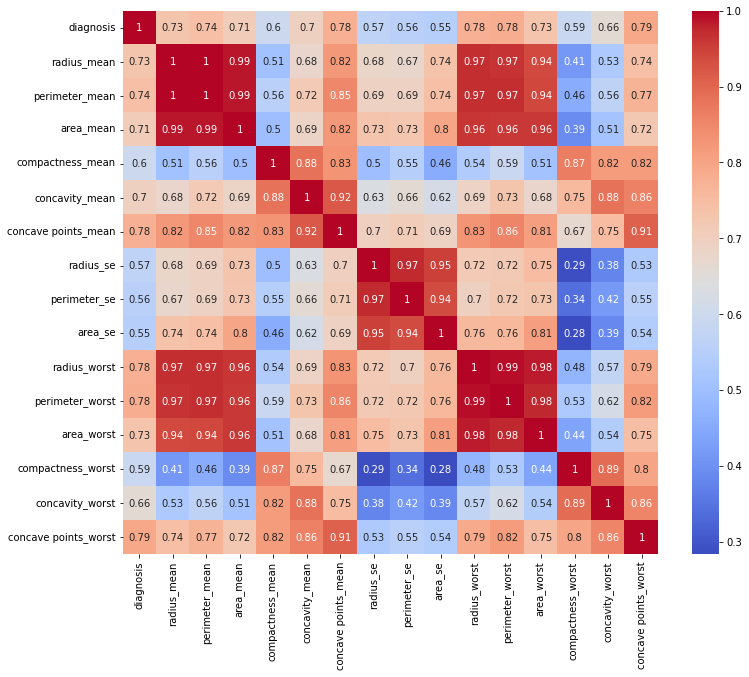

In [18]:
# Visualize the features and target variable using the correlation matrix. 
# We will use the Pearson Correlation method.
plt.figure(figsize=(12,10)) 
cor = bc_data.corr() 
sns.heatmap(cor, annot=True, cmap='coolwarm')

In [20]:
# Split bc_data into training data and test data.
# First, we need to divide our data into x values (the data we will use to make predictions) 
# and y values (the data we are attempting to predict).
x_data = bc_data.drop('diagnosis', axis = 1)
y_data = bc_data['diagnosis']

In [21]:
# Import the train_test_split function from scikit-learn.
from sklearn.model_selection import train_test_split

In [37]:
# Use train_test_split function to generate training data and test data.Test data set is 30% of original data set. 
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.30, random_state=42)

In [39]:
# Normalize the feature datasets. StandardScaler will transform the data so that its distribution 
# will have a mean value 0 and standard deviation of 1. 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_training_data = sc.fit_transform(x_training_data)
x_test_data = sc.fit_transform(x_test_data)

**We will now train models, make predictions and evaluate the performance of four different models.**

**Logical Regression Model**

In [40]:
# Create model object. 
model_lr = LogisticRegression(random_state=0)
# Train the model on the training data.
model_lr.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_lr = model_lr.predict(x_test_data)

In [41]:
# Calculate the Accuracy Score.
lr = accuracy_score(y_test_data, predictions_lr)
print(lr)

0.9649122807017544


In [42]:
# Show the classification report. 
print(classification_report(y_test_data, predictions_lr))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



The logical regression model correctly predicted 96% of breast cancers to be benign or malignant.
*   96% correctly predicted breast cancer to be benign.
*   97% correctly predicted breast cancer to be malignant.

**Random Forrest Model**

In [43]:
# Create model object. 
model_rf = RandomForestClassifier(n_estimators = 200)
# Train the model on the training data.
model_rf.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_rf = model_rf.predict(x_test_data)

In [44]:
# Calculate the Accuracy Score.
rf = accuracy_score(y_test_data, predictions_rf)
print(rf)

0.9649122807017544


In [45]:
# Show the classification report. 
print(classification_report(y_test_data, predictions_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



The random forrest model correctly predicted 96% of breast cancers to be benign or malignant.
*   96% correctly predicted breast cancer to be benign.
*   97% correctly predicted breast cancer to be malignant.

**K Nearest Neighbors**

In [46]:
# Create model object. 
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20) # (n_neighbors = 5, metric = 'minkowski', p = 2) 
# Train the model on the training data.
model_kn.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_kn = model_kn.predict(x_test_data)

In [47]:
# Calculate the Accuracy Score.
kn = accuracy_score(y_test_data, predictions_kn)
print(kn)

0.9415204678362573


In [48]:
# Show the classification report. 
print(classification_report(y_test_data, predictions_kn))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



The k nearest neighbors model correctly predicted 94% of breast cancers to be benign or malignant.
*   95% correctly predicted breast cancer to be benign.
*   93% correctly predicted breast cancer to be malignant.

**Support Vector Machine** 

In [49]:
# Create model object. 
model_svc = SVC(C=10, gamma=0.01, kernel='rbf') 
# Train the model on the training data.
model_svc.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_svc = model_svc.predict(x_test_data)

In [50]:
# Calculate the Accuracy Score.
svm = accuracy_score(y_test_data, predictions_svc)
print(svm)

0.9415204678362573


In [51]:
# Show the classification report. 
print(classification_report(y_test_data, predictions_svc))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       108
           1       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



The support vector machine model correctly predicted 94% of breast cancers to be benign or malignant.
*   94% correctly predicted breast cancer to be benign.
*   95% correctly predicted breast cancer to be malignant.

**Extreme Gradient Boosting**

In [54]:
# Create model object. 
model_xgb = XGBClassifier()
# Train the model on the training data.
model_xgb.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_xgb = model_xgb.predict(x_test_data)

In [55]:
# Calculate the Accuracy Score.
xgb = accuracy_score(y_test_data, predictions_xgb)
print(xgb)

0.9532163742690059


In [56]:
# Show the classification report. 
print(classification_report(y_test_data, predictions_xgb))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



The extreme gradient boost model correctly predicted 95% of breast cancers to be benign or malignant.
*   95% correctly predicted breast cancer to be benign.
*   97% correctly predicted breast cancer to be malignant.

,Model,Accuracy_score
0,Logistic Regression,0.964912
1,Random Forest,0.964912
4,Extreme Gradient Boost,0.953216
2,KNeighbours,0.941520
3,Support Vector Machine,0.941520


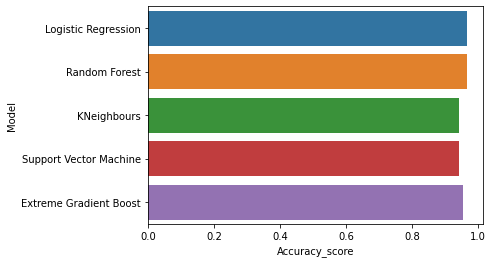

In [57]:
# Show Accuraccy Score by Model.
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Random Forest', 'KNeighbours', 'Support Vector Machine', 'Extreme Gradient Boost'],
    'Accuracy_score' :[lr, rf, kn, svm, xgb]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

Conclusions: All of the models tested showed high accuracy scores ranging from 94.15% to 96.49%. The logistic regression and random forest models had the highest accuracy scores. These models correctly predicted over 96% of breast cancers to be benign or malignant.   

The models accuracy scores may be improved by having a larger dataset and tuning some of the models hyper parameters.   


